

# <font color = black|red|yellow>**********Time Series Analysis**********</font>

Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals.  The data is considered in three types:

### <b>Time series data:</b>  
A set of observations on the values that a variable takes at different times.

### <b>Cross-sectional data:</b>
Data of one or more variables, collected at the same point in time.

### <b>Pooled data:</b> 
A combination of time series data and cross-sectional data.
<br>

## <font color = darkyellow><b>Terms and concepts:</b></font>
### <b>Dependence:</b> 
Dependence refers to the association of two observations with the same variable, at prior time points.

### <b>Stationarity:</b> 
Shows the mean value of the series that remains constant over a time period; if past effects accumulate and the values increase toward infinity, then stationarity is not met.

### <b>Differencing:</b> 
Used to make the series stationary, to De-trend, and to control the auto-correlations; however, some time series analyses do not require differencing and over-differenced series can produce inaccurate estimates.

### <b>Specification:</b> 
May involve the testing of the linear or non-linear relationships of dependent variables by using models such as ARIMA, ARCH, GARCH, VAR, Co-integration, etc.


## <font color = darkyellow><b>TimeExponential smoothingreenime series analysis:</b></font>
        
This method predicts the one next period value based on the past and current value.  It involves averaging of data such that the nonsystematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term predication.  Alpha, Gamma, Phi, and Delta are the parameters that estimate the effect of the time series data.  Alpha is used when seasonality is not present in data.  Gamma is used when a series has a trend in data.  Delta is used when seasonality cycles are present in data.  A model is applied according to the pattern of the data.  Curve fitting in time series analysis: Curve fitting regression is used when data is in a non-linear relationship. The following equation shows the non-linear behavior:
Dependent variable, where case is the sequential case number.
Curve fitting can be performed by selecting “regression” from the analysis menu and then selecting “curve estimation” from the regression option. Then select “wanted curve linear,” “power,” “quadratic,” “cubic,” “inverse,” “logistic,” “exponential,” or “other.”<br>

### <b>ARIMA:</b><br>
ARIMA stands for autoregressive integrated moving average.  This method is also known as the Box-Jenkins method.
Identification of ARIMA parameters: 
    
### <b>Autoregressive component:</b>
AR stands for autoregressive.  Autoregressive paratmeter is denoted by p.  When p =0, it means that there is no auto-correlation in the series.  When p=1, it means that the series auto-correlation is till one lag.<br>

### <b>Integrated:</b> 
In ARIMA time series analysis, integrated is denoted by d.  Integration is the inverse of differencing.  When d=0, it means the series is stationary and we do not need to take the difference of it.  When d=1, it means that the series is not stationary and to make it stationary, we need to take the first difference.  When d=2, it means that the series has been differenced twice.  Usually, more than two time difference is not reliable.<br>

### <b>Moving average component:</b> 
MA stands for moving the average, which is denoted by q.  In ARIMA, moving average q=1 means that it is an error term and there is auto-correlation with one lag.
In order to test whether or not the series and their error term is auto correlated, we usually use W-D test, ACF, and PACF.<br>
### <b>Decomposition:</b> 
Refers to separating a time series into trend, seasonal effects, and remaining variabilityAssumptions:<br>

### <b>Stationarity:</b> 
The first assumption is that the series are stationary.  Essentially, this means that the series are normally distributed and the mean and variance are constant over a long time period.<br>
### <b>Uncorrelated random error:</b> 
We assume that the error term is randomly distributed and the mean and variance are constant over a time period.  The Durbin-Watson test is the standard test for correlated errors.

# <font color = black|red><b>Air Passengers Forecasting Using Time Series Analysis</b></font>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
from datetime import datetime


In [74]:

dataset = pd.read_csv("AirPassengers.csv")
# Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

from datetime import datetime
indexedDataset['1949-03']
indexedDataset['1949-03':'1949-06']
indexedDataset['1949']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [46]:
df = indexedDataset
df.shape

(144, 1)

In [47]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 7.2 KB


In [48]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


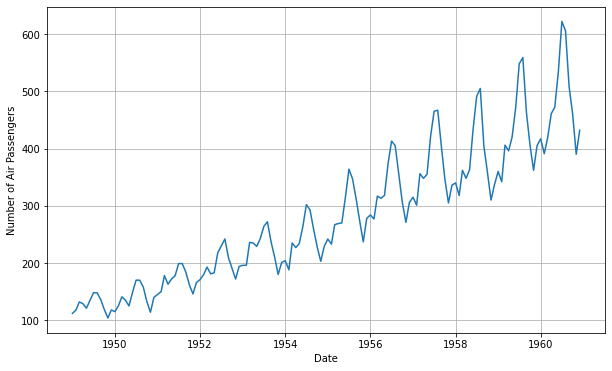

In [52]:
plt.xlabel("Date")
plt.ylabel("Number of Air Passengers")
plt.grid()
plt.plot(df)

### <font color = gray>Determine Rolling Statistics</font>

In [76]:
#check Stationary
#determine rolling statistics

rolmean = df.rolling(window=12).mean()

rolstd = df.rolling(window=12).std()
print(rolmean, rolstd)


            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


### <font color = gray>Rolling Mean & Standard Deviation</font>


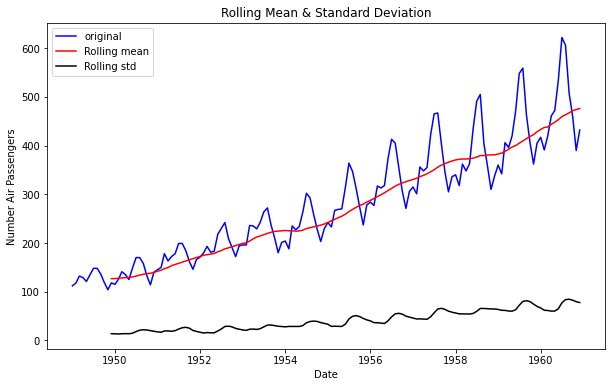

In [71]:
original_data = plt.plot(df,color='blue',label = 'original')
mean = plt.plot(rolmean,color='red', label='Rolling mean')
std = plt.plot(rolstd,color='black', label = 'Rolling std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Number Air Passengers")
plt.show(block= False)

 ### <font color= gray >Perform Dickey-Fuller Test:</font>

In [129]:
from statsmodels.tsa.stattools import adfuller

print('Results of Deckey-Fuller Test: ')
dftest = adfuller(df['#Passengers'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]= value
    
print(dfoutput)

Results of Deckey-Fuller Test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### <font color= gray>Estimating Trend</font>

Text(0, 0.5, 'Number Air Passengers')

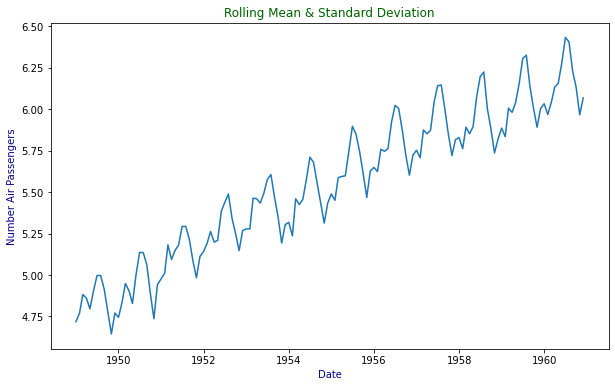

In [130]:
df_logScale = np.log(df)
plt.plot(df_logScale)
plt.title("Rolling Mean & Standard Deviation",color = 'darkgreen')
plt.xlabel("Date",color = 'darkblue')
plt.ylabel("Number Air Passengers",color ='darkblue')

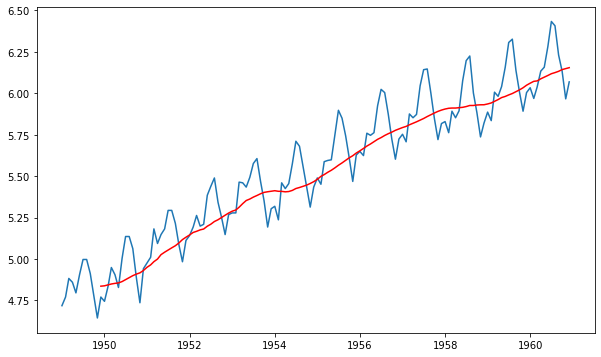

In [131]:
moving_avg = df_logScale.rolling(window=12).mean()
moving_STD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(moving_avg, color = 'red')

In [132]:
df_logScale_moving_avg = df_logScale - moving_avg
df_logScale_moving_avg.head(12)

#Remove NA values
df_logScale_moving_avg.dropna(inplace =True)
df_logScale_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


### <font color = gray> Apply DCF Function</font>

In [133]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #Determing rolling statistics
    
    moving_avg = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window =12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(moving_avg, color = 'red', label = 'Rolling mean')
    std = plt.plot(moving_std, color = 'darkgray', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard deviation')
    plt.show(block=False)
    
    #perform Dickey_Fuller test
    
    print("Results of Dickey_Fuller test: ")
    dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
                         

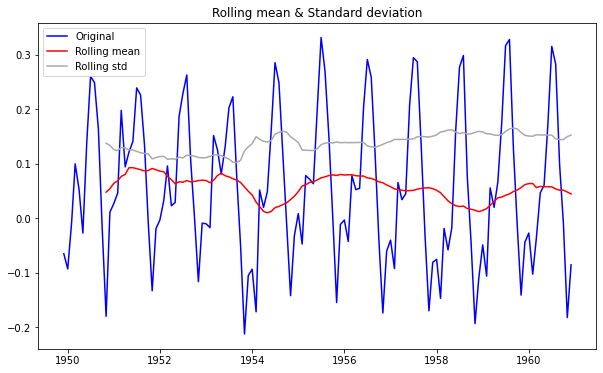

Results of Dickey_Fuller test: 
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [134]:
test_stationary(df_logScale_moving_avg)

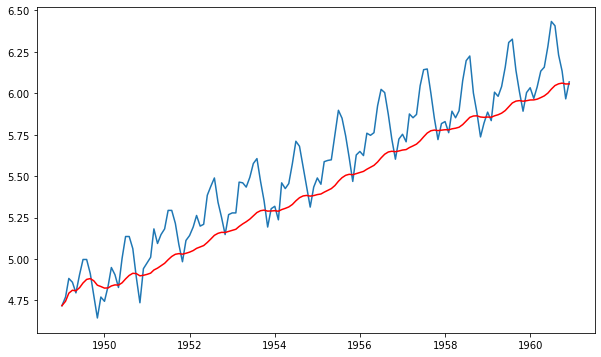

In [135]:
exp_dec_weight_avg = df_logScale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exp_dec_weight_avg, color = 'red')

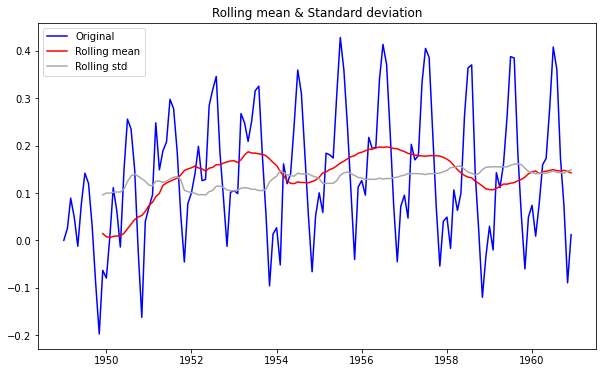

Results of Dickey_Fuller test: 
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [136]:
df_logScale_moving_exp_dec_avg = df_logScale - exp_dec_weight_avg
test_stationary(df_logScale_moving_exp_dec_avg)

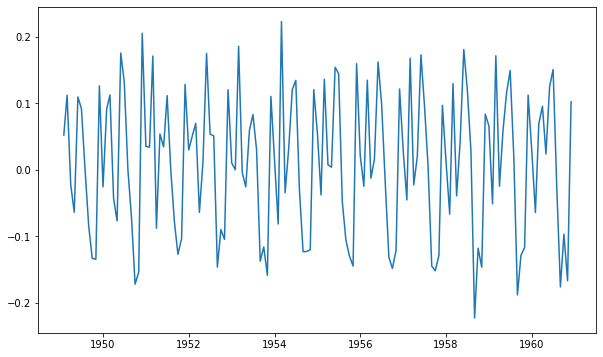

In [139]:

df_log_dif_shifting = df_logScale - df_logScale.shift()

plt.plot(df_log_dif_shifting)

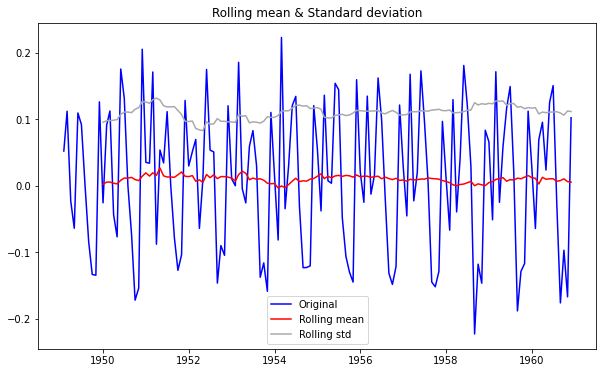

Results of Dickey_Fuller test: 
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [140]:
df_log_dif_shifting.dropna(inplace= True)
test_stationary(df_log_dif_shifting)

### <font color = gray>Show  Components</font>

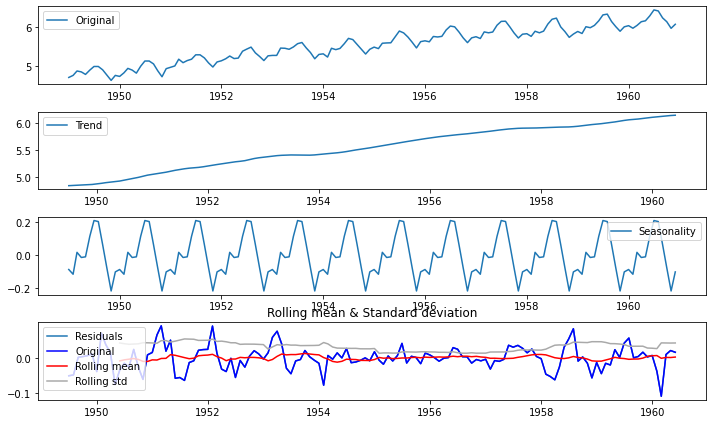

Results of Dickey_Fuller test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposed_log_data = residual
decomposed_log_data.dropna(inplace =True)
test_stationary(decomposed_log_data)

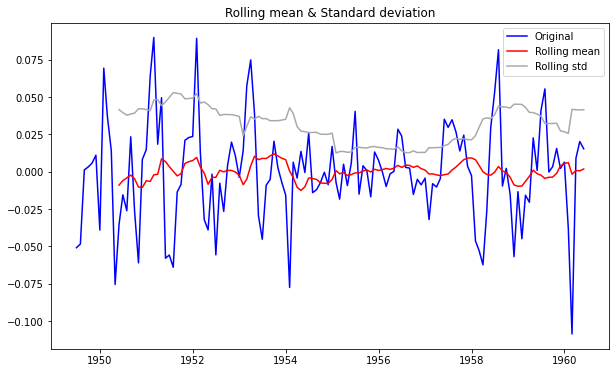

Results of Dickey_Fuller test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [146]:
decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationary(decomposed_log_data)

### <font color=gray>ACF and PACF plots </font>

C:\Users\zaliz\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


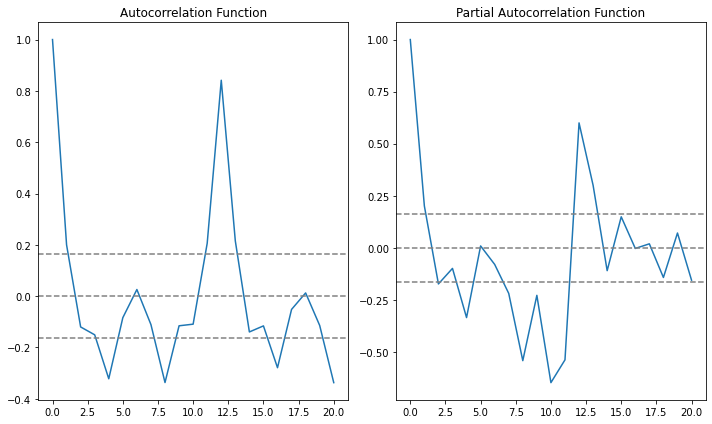

In [167]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_log_dif_shifting, nlags=20)
lag_pacf = pacf(df_log_dif_shifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_dif_shifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_dif_shifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_dif_shifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_dif_shifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\zaliz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\zaliz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


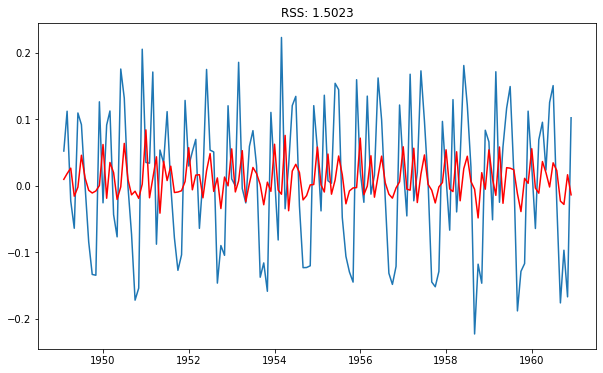

In [149]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(df_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_log_dif_shifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log_dif_shifting["#Passengers"])**2))
print('Plotting AR model')

C:\Users\zaliz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\zaliz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


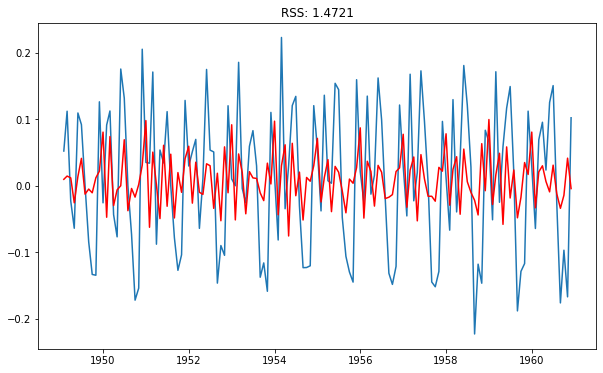

In [150]:
#MA MODEL
model = ARIMA(df_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_dif_shifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_log_dif_shifting["#Passengers"])**2))
print('Plotting AR model')

C:\Users\zaliz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\zaliz\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

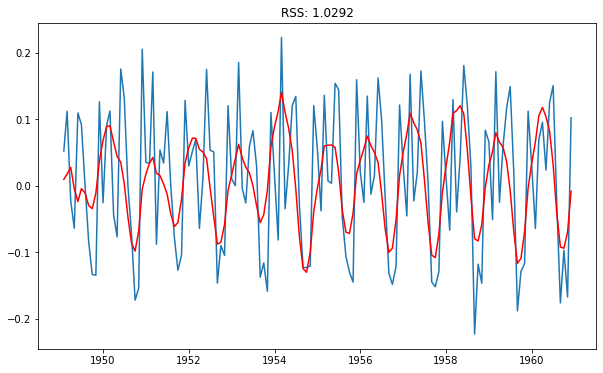

In [152]:
model = ARIMA(df_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_dif_shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_dif_shifting["#Passengers"])**2))

In [153]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [154]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [156]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(df_logScale['#Passengers'].ix[0], index=df_logScale['#Passengers'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\zaliz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 218.2218')

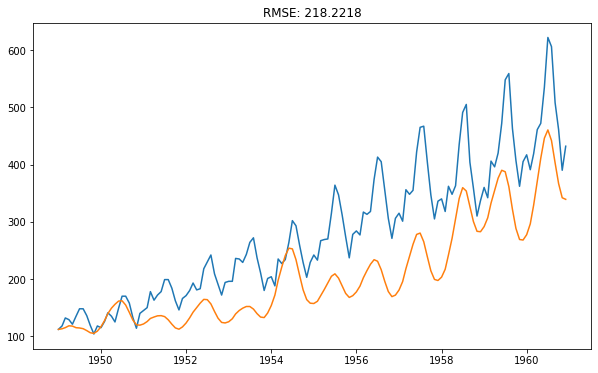

In [157]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df_logScale["#Passengers"])**2)/len(df["#Passengers"])))

In [158]:
df_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


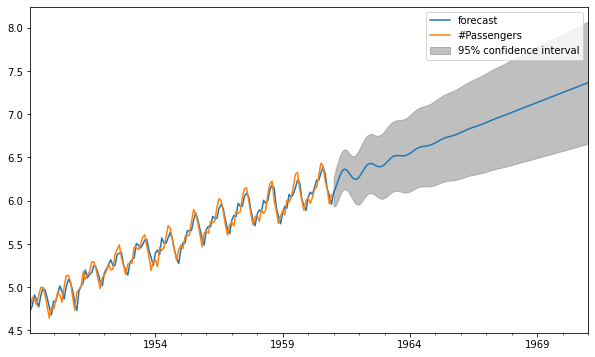

In [161]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=120)

# <font color = darkgreen> ******GOOD BYE***** </font>